<div style="font-family:monospace; 
            font-weight: bold; 
            border-radius:10px; 
            border:#f77f00 solid; 
            padding: 50px; 
            background-color: #caf0f8; 
            font-size:300%; 
            text-align: right">
    
 Polars: an Alternative to Pandas 

**TA: Collin Sakal**

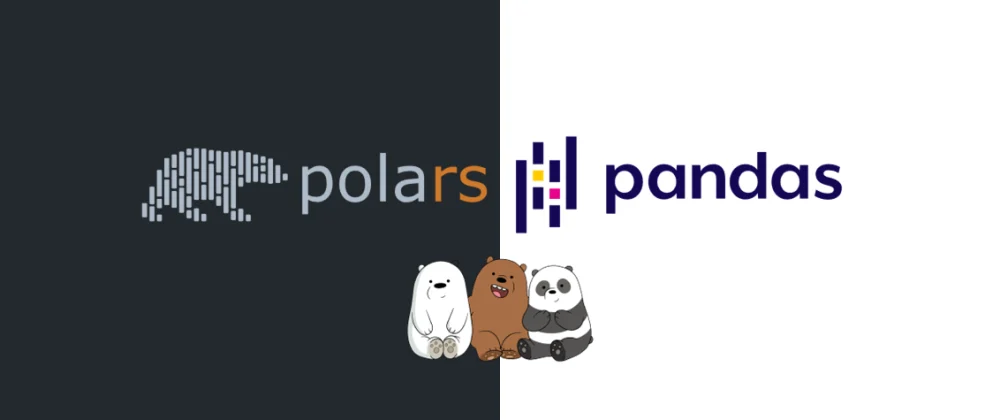

<div style="font-family:monospace; 
            border-radius:10px; 
            border:#f77f00 solid; 
            padding: 20px; 
            background-color: #caf0f8; 
            font-size:100%; 
            text-align: right">

<h3 align="left"><font color='#000000'>Why learn Polars when we already know Pandas?</font></h3>


Polars is similar to Pandas in that it is used to create and manipulate data frames. However, Polars is often much faster than Pandas when working with large data sets. Some people also prefer Polars because the syntax is more intuitive, though that is a matter of personal opinion.

**Note:** Polars has very good documentation, which can be found [here](https://pola-rs.github.io/polars/py-polars/html/reference/). Other links throughout this notebook point towards the relevant documentation for the functions discussed in each section of the notebook.

<p style="font-family: monospace; 
          font-weight: bold; 
          letter-spacing: 1px; 
          color: black; 
          font-size: 200%; 
          text-align: left;
          padding: 8px; 
          border-bottom: 3px solid #4cc9f0" >Table of Contents</p>

1. [Getting started with Polars](#section-one)
2. [Polars Series](#section-two)
3. [Data frames and operations on data frames](#section-three)
4. [Converting between Polars objects and Numpy arrays](#section-four)
5. [Extras](#section-five)
6. [Useful links](#section-six)

<a id="section-one"></a>
<p style="font-family: monospace; 
          font-weight: bold; 
          letter-spacing: 1px; 
          color: black; 
          font-size: 200%; 
          text-align: left;
          padding: 8px; 
          border-bottom: 3px solid #4cc9f0" >(1) Getting Started</p>
        
Polars can be installed using ```!pip```. The shorthand for Polars is ```pl.``` and operations/function/methods are usually accessed using ```pl.function()``` in the same way ```pd.``` is used for Pandas.

In [3]:
# Polars install
%pip install polars

In [3]:
# Update to latest version if polars is already installed
%pip install -U polars
#!pip install  polars==0.19.11 # This will work too

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.0/23.0 MB 18.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Imports
import polars as pl
import numpy as np

<a id="section-two"></a>
<p style="font-family: monospace; 
          font-weight: bold; 
          letter-spacing: 1px; 
          color: black; 
          font-size: 200%; 
          text-align: left;
          padding: 8px; 
          border-bottom: 3px solid #4cc9f0" > (2) Series</p>
     
Similar to Pandas, Polars also has a [series class](https://pola-rs.github.io/polars/py-polars/html/reference/series/index.html) that can be thought of as a 1D vector. A series can be creating using ```pl.Series(name, values)``` where the ```values``` argument is a list ```[,]``` or numpy array ```np.array()```.

<p style="font-family: monospace; 
          font-weight: bold; 
          letter-spacing: 1px; 
          color: black; 
          font-size: 150%; 
          text-align: left;
          padding: 2px; 
          border-bottom: 2px solid #4cc9f0" > (2a) Creating a Series</p>

In [5]:
list_values = [1,2,3,4,5]

pl.Series(name='example_series_1', values=list_values) # from a list

example_series_1
i64
1
2
3
4
5


In [6]:
numpy_values = np.array([6,7,8,9,10])

pl.Series('example_series_2', values = numpy_values) # from a numpy array

example_series_2
i64
6
7
8
9
10


<p style="font-family: monospace; 
          font-weight: bold; 
          letter-spacing: 1px; 
          color: black; 
          font-size: 150%; 
          text-align: left;
          padding: 2px; 
          border-bottom: 2px solid #4cc9f0" > (2b) Common Operations (Methods) for Polars Series</p>

Assume we have a Polars series named ```ages``` that contains the ages of students in SDSC2001. Polars series methods are generally in the format ```Series.method()```. Some common methods are listed in the table below, for a complete list see the [documentation](https://pola-rs.github.io/polars/py-polars/html/reference/series/aggregation.html).

| Function | What the function returns | Notes |
| :--- | :--- | :--- | 
| ```.max()``` | maximum value in the series | |
| ```.min()```| minimum value in the series| |
|```.std()```| standard deviation of the values in the series| |
|```.mean()``` | mean of the values in the series | |
| ```.median()``` | median of the values in the series | |
| ```.mode()``` | most frequently occuring value in the series | |
| ```.quantile(q)``` | the value of the q-th quantile in the series | for example to find the value of the 25th quantile we would use ```Series.quantile(0.25)```| 
| ```.sum()``` | sum of all the values in the series | |
| ```.arg_max()``` | index of the maximum value in the series | |
| ```.arg_min()``` | index of the minimum value in the series | |
| ```.sort()``` | the series sorted | takes an argument ```descending = True/False```that determines if the series is sorted from smallest to largest or vice versa. |
| ```.len()```|The length of the series||


In [7]:
# Create a series
ages = pl.Series(
    name='ages',
    values=[17,18,21,19,18,18,23,22,18,18,18,24,22,21,21,21]
)

# Calculate some simple statistics and print the results
print(f'The max age is: {ages.max()}')
print(f'The min age is: {ages.min()}')
print(f'The standard deviation of ages is: {ages.std()}')
print(f'The mean (average) age is: {ages.mean()}')
print(f'The median age is: {ages.median()}')
print(f'The 25th quantile of ages is: {ages.quantile(0.25)}')
print(f'The sum of all ages is: {ages.sum()}')
print(f'The index of the max age is: {ages.arg_max()}')
print(f'The index of the minimum age is: {ages.arg_min()}')
print(f'The length of the series is {ages.len()}')

The max age is: 24
The min age is: 17
The standard deviation of ages is: 2.174664725116648
The mean (average) age is: 19.9375
The median age is: 20.0
The 25th quantile of ages is: 18.0
The sum of all ages is: 319
The index of the max age is: 11
The index of the minimum age is: 0
The length of the series is 16


In [8]:
# The sorted series
ages.sort(descending=True)

ages
i64
24
23
22
22
21
21
21
21
19


<p style="font-family: monospace; 
          font-weight: bold; 
          letter-spacing: 1px; 
          color: black; 
          font-size: 150%; 
          text-align: left;
          padding: 2px; 
          border-bottom: 2px solid #4cc9f0" > (2c) Slicing Polars Series</p>
          
There are multiple ways to slice a series in Polars. For getting index values ```.slice(first_index, last_index)``` can be used. Note that, as in common across python libraries, the last index will not be included in the output. To subset a series based on some condition you can use ```.filter(condition)```.

In [9]:
# Slicing the ages series
ages.slice(0,5)

ages
i64
17
18
21
19
18


In [10]:
# Subsetting the series
ages.filter(ages < 19)

ages
i64
17
18
18
18
18
18
18


<a id="section-three"></a>
<p style="font-family: monospace; 
          font-weight: bold; 
          letter-spacing: 1px; 
          color: black; 
          font-size: 200%; 
          text-align: left;
          padding: 8px; 
          border-bottom: 3px solid #4cc9f0" > (3) Data Frames</p>
          
Data frames store information in 2D using rows and columns. Polars data frames can be created from dictionaries, by combing individual series, from numpy arrays, from pandas data frames, or by reading in a file (such as a .csv file) in the following ways:

| Data type | How to create a Polars data frame | Notes| 
| :--- | :--- | :--- |
| dictionary | ```pl.DataFrame(dictionary)``` | |
| multiple polars series | ```pl.DataFrame([series1, series2, ...])``` | The series must be in a list ```[,]```. The data frame will inherit the series names and use them as column names. |
| a numpy array | ```pl.DataFrame(array, schema=['colname1', 'colname2', ...])``` | the column names must be in a list ```[,]``` and passed to the ```schema``` argument|
| pandas data frame | ```pl.from_pandas(pandas_df)```| this option is not used very often as you can usually just read in a polars df directly (see below)|
| from a local file | ```pl.read_csv('file path')``` | this exammple is for a .csv files but polars can handle many other file types|

<p style="font-family: monospace; 
          font-weight: bold; 
          letter-spacing: 1px; 
          color: black; 
          font-size: 150%; 
          text-align: left;
          padding: 2px; 
          border-bottom: 2px solid #4cc9f0" > (3a) Creating a Polars data frame</p>

**From a dictionary:** ```pl.DataFrame(dictionary)```

In [11]:
# From a dictionary
example_dict = {
    'age' : [20,21,22],
    'birth year': [2003,2004,2005],
    'education': ['High school', 'Bachelors', 'Bachelors']
}

example_df1 = pl.DataFrame(example_dict)

example_df1

age,birth year,education
i64,i64,str
20,2003,"""High school"""
21,2004,"""Bachelors"""
22,2005,"""Bachelors"""


**By combining multiple polars series:** ```pl.DataFrame([series1, series2, ...])```

In [12]:
# By combining polars series
age = pl.Series(name='age',values=[20,21,22])
birth = pl.Series(name='birth year', values=[2003,2004,2005])
education = pl.Series(name='education',values=['High school', 'Bachelors', 'Bachelors'])

# Note that series are passed within a list [series1, series2,...]
example_df2 = pl.DataFrame([age, birth, education])

example_df2

age,birth year,education
i64,i64,str
20,2003,"""High school"""
21,2004,"""Bachelors"""
22,2005,"""Bachelors"""


**From a numpy array:** ```pl.DataFrame(array, schema = ['column name 1', 'column name 2', ...])```

In [ ]:
# From a numpy array
example_array = np.array([[20, 2003, 'High School'], [21, 2002, 'Bachelors'], [22, 2001, 'Bachelors']])

# Creating the data frame
example_df3 = pl.DataFrame(
        example_array, 
        schema = {'age': pl.Int64, 'birth year': pl.Int64, 'education': pl.Utf8} 
    )

example_df3

<div style="font-family:monospace; 
            border-radius:10px; 
            border:#A8A8A8 solid; 
            padding: 15px; 
            background-color: #caf0f8; 
            font-size:100%; 
            text-align:left">

<h3 align="left"><font color='#000000'>🖊 Extra Notes:</font></h3>

* When creating a data frame from a numpy array use ```schema``` to specify the column names and ```dtype``` for each column. Note that this is not necessary, you can also pass only column names to a list ```schema = ['name1', 'name2']``` and allow Polars to infer the ```dtype``` automatically. 
* It may also be necessary to change the ``dtype`` of specific columns after creating a data frame. This process is known as casting.
* Please refer to the [examples in the Polars documentation](https://pola-rs.github.io/polars-book/user-guide/expressions/casting/#numerics) for more information.

<p style="font-family: monospace; 
          font-weight: bold; 
          letter-spacing: 1px; 
          color: black; 
          font-size: 150%; 
          text-align: left;
          padding: 2px; 
          border-bottom: 2px solid #4cc9f0" > (3b) Common Data Frame Operations (Methods)</p>
 
Assume the data frame is named ```df```, the code below cover the following methods:

| Operations | Function(s) | Notes| 
| :--- | :--- | :--- |
| Getting the data's dimensions | ```df.shape``` ```df.width``` ```df.height```| shape returns (rows, columns) while width returns (columns) and height returns (rows)|
| Getting column names | ```df.columns``` | returns the column names in a list |
| Selecting specific columns | ```df.select(['colname1', 'colname2', ....])```| column names must be strings inside a list ```[,]```. Will return a new data frame with the selected columns|
| Selecting one column | ```df.select(['colname'])``` ```df.get_column('colname')``` |```.select()``` returns a data frame whereas ```get_column()``` returns a series|
| Filtering (subsetting) the data | ```df.filter(pl.col('colname') == value)``` | filters (subsets) the data frame based on a condition. If the condition is based on a column then that column must be referenced using ```pl.col()``` and some condition ```==, <, <=, >, >=, !=, is_in(), etc```|
| Sorting the data |```df.sort(['colname1', ...], descending = True/False)```| sorts the data frame based on one or more columns. The column names must be passed in a list ```[,]```. Ther direction of the sort can be changed using the ```descending``` argument|
|Grouped operations|```df.group_by(pl.col('colname')).agg( ..operations ..)```| is used to perform operations within groups|
|Renaming columns| ```df.rename({old name: new name})```| multiple columns can be included in the dictionary passed to the ```.rename()``` function|
| Creating new or editing existing columns | ```df.with_columns( ..operations.. )``` | calculations and functions used to create a new column or edit existing columns must be passed to ```.with_columns()``` |
| Combining (concating) data frames | ```pl.concat([df1, df2])``` ```pl.join()``` | data frames must be enetered in a list ```[,]``` for ```pl.concat()``` and the default functionality is to vertically stack the data frames. ```pl.join()``` offers more control for SQL-style joins.|
|Viewing the data frame|```df.head(k)``` ```df.tail(k)```, ```df.glimpse()```| ```.head(k)``` returns the first ```k``` rows of the data frame, ```.tail(k)``` retuns the last ```k``` rows and ```.glimpse()``` gives a summary of the column names and data types

<p style="font-family: monospace; 
          font-weight: bold; 
          letter-spacing: 1px; 
          color: black; 
          font-size: 150%; 
          text-align: left;
          padding: 2px; 
          border-bottom: 2px solid #4cc9f0" > (3c) Common Data Frame Operations: Examples</p>
          
 Now lets try and manipulate a real data frame. First we will read in the ```stroke-data.csv``` file using ```pl.read_csv()```. The data frame contains health information where each row contains information about a single person.

In [14]:
# Read in the data set 
df = pl.read_csv('../data/stroke-data.csv')

# Use df.glimpse() to get an overview of the columns and data types
df.glimpse()

Rows: 15304
Columns: 12
$ id                <i64> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
$ gender            <str> 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female'
$ age               <f64> 28.0, 33.0, 42.0, 56.0, 24.0, 34.0, 53.0, 78.0, 45.0, 62.0
$ hypertension      <i64> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
$ heart_disease     <i64> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0
$ ever_married      <str> 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'
$ work_type         <str> 'Private', 'Private', 'Private', 'Private', 'Private', 'Private', 'Private', 'Self-employed', 'Private', 'Govt_job'
$ Residence_type    <str> 'Urban', 'Rural', 'Rural', 'Urban', 'Rural', 'Urban', 'Rural', 'Rural', 'Rural', 'Urban'
$ avg_glucose_level <f64> 79.53, 78.44, 103.0, 64.87, 73.36, 84.35, 88.97, 75.32, 107.22, 62.68
$ bmi               <f64> 31.1, 23.9, 40.3, 28.8, 28.8, 22.2, 25.3, 24.8, 34.1, 18.4
$ smoking_status    <str> 'never smoked', 'formerly smoked', 'Unknown', 'neve

In [15]:
# Use df.head(k) to view the first k rows 
df.head(10)

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
i64,str,f64,i64,i64,str,str,str,f64,f64,str,i64
0,"""Male""",28.0,0,0,"""Yes""","""Private""","""Urban""",79.53,31.1,"""never smoked""",0
1,"""Male""",33.0,0,0,"""Yes""","""Private""","""Rural""",78.44,23.9,"""formerly smoke…",0
2,"""Female""",42.0,0,0,"""Yes""","""Private""","""Rural""",103.0,40.3,"""Unknown""",0
3,"""Male""",56.0,0,0,"""Yes""","""Private""","""Urban""",64.87,28.8,"""never smoked""",0
4,"""Female""",24.0,0,0,"""No""","""Private""","""Rural""",73.36,28.8,"""never smoked""",0
5,"""Female""",34.0,0,0,"""Yes""","""Private""","""Urban""",84.35,22.2,"""Unknown""",0
6,"""Female""",53.0,0,0,"""Yes""","""Private""","""Rural""",88.97,25.3,"""never smoked""",0
7,"""Male""",78.0,0,1,"""Yes""","""Self-employed""","""Rural""",75.32,24.8,"""Unknown""",0
8,"""Female""",45.0,0,0,"""Yes""","""Private""","""Rural""",107.22,34.1,"""never smoked""",0


**Getting the data dimensions**

In [16]:
# Getting the dimensions of the df
print(f'The shape of the df is (rows, columns) = {df.shape}')
print(f'The df has {df.width} columns and {df.height} rows')

The shape of the df is (rows, columns) = (15304, 12)
The df has 12 columns and 15304 rows


**Getting column names** (note the names are given in a list)

In [17]:
print('The column names are:')
df.columns

The column names are:


['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

**Selecting specific columns** (note using ```.select()``` returns a data frame)

In [18]:
# Selecting multiple columns that returns a data frame
df.select(['gender', 'age', 'heart_disease'])

gender,age,heart_disease
str,f64,i64
"""Male""",28.0,0
"""Male""",33.0,0
"""Female""",42.0,0
"""Male""",56.0,0
"""Female""",24.0,0
"""Female""",34.0,0
"""Female""",53.0,0
"""Male""",78.0,1
"""Female""",45.0,0


In [19]:
# Selecting one column that returns a data frame
df.select(['age'])

age
f64
28.0
33.0
42.0
56.0
24.0
34.0
53.0
78.0
45.0


In [20]:
# For selecting a single column that returns a series
df.get_column('age')

age
f64
28.0
33.0
42.0
56.0
24.0
34.0
53.0
78.0
45.0


<div style="font-family:monospace; 
            border-radius:10px; 
            border:#f77f00 solid; 
            padding: 20px; 
            background-color: #caf0f8; 
            font-size:100%; 
            text-align: left">

<h3 align="left"><font color='#000000'>Filtering (subsetting) data frames</font></h3>


Often times we are interested in a subset of the original data frame. Consider the following tasks

1. Filter the data to only include men
2. Filter the data to include only men and those with heart disease (1 = has heart disease in the data)
3. Filter the data to include people older than 45 with a BMI greater than or equal to 30



<div style="font-family:monospace; 
            border-radius:10px; 
            border:#A8A8A8 solid; 
            padding: 15px; 
            background-color: #caf0f8; 
            font-size:100%; 
            text-align:left">

<h3 align="left"><font color='#000000'>🖊 Extra Notes:</font></h3>

* When filtering we need to use ```pl.col('column name')``` to indicate which column we would like to filter based on. An easy way to remember is ```.col``` is short for ```.column```.
* Multiple filter statements can be chained together using ```df.filter().filter()```
* Conditional logic can be used within ```.filter()``` by using ```df.filter((condition 1) & (condition 2))``` (use ```|``` instead of ```&``` for 'or' logic).
* To know what to filter by we may need to figure out the values in each column. For example, we need to know the encodings for each gender in the ```gender``` column. To do this we could use ```df.select(['gender']).unique()```

In [21]:
# First determine the encodings for gender
df.select(['gender']).unique()

gender
str
"""Female"""
"""Other"""
"""Male"""


In [22]:
# Filter the data to only include men
df.filter(pl.col('gender') == 'Male')

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
i64,str,f64,i64,i64,str,str,str,f64,f64,str,i64
0,"""Male""",28.0,0,0,"""Yes""","""Private""","""Urban""",79.53,31.1,"""never smoked""",0
1,"""Male""",33.0,0,0,"""Yes""","""Private""","""Rural""",78.44,23.9,"""formerly smoke…",0
3,"""Male""",56.0,0,0,"""Yes""","""Private""","""Urban""",64.87,28.8,"""never smoked""",0
7,"""Male""",78.0,0,1,"""Yes""","""Self-employed""","""Rural""",75.32,24.8,"""Unknown""",0
10,"""Male""",51.0,0,0,"""Yes""","""Self-employed""","""Urban""",114.89,20.1,"""never smoked""",0
13,"""Male""",23.0,0,0,"""No""","""Private""","""Urban""",112.09,37.3,"""smokes""",0
22,"""Male""",71.0,0,1,"""Yes""","""Self-employed""","""Urban""",196.61,33.5,"""formerly smoke…",0
23,"""Male""",50.0,0,0,"""Yes""","""Private""","""Urban""",80.57,36.7,"""never smoked""",0
26,"""Male""",38.0,0,0,"""Yes""","""Private""","""Urban""",89.21,27.0,"""Unknown""",0


In [23]:
# Filter the data to only include men with heart disease
# df.filter(pl.col('gender') == 'Male').filter(pl.col('heart_disease') == 1)

# The code below is equivalent
df.filter((pl.col('gender') == 'Male') & (pl.col('heart_disease') == 1))

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
i64,str,f64,i64,i64,str,str,str,f64,f64,str,i64
7,"""Male""",78.0,0,1,"""Yes""","""Self-employed""","""Rural""",75.32,24.8,"""Unknown""",0
22,"""Male""",71.0,0,1,"""Yes""","""Self-employed""","""Urban""",196.61,33.5,"""formerly smoke…",0
81,"""Male""",54.0,0,1,"""Yes""","""Private""","""Urban""",140.28,31.9,"""smokes""",0
132,"""Male""",56.0,0,1,"""Yes""","""Private""","""Urban""",82.44,23.9,"""formerly smoke…",0
180,"""Male""",78.0,0,1,"""Yes""","""Self-employed""","""Urban""",57.2,30.1,"""formerly smoke…",0
186,"""Male""",82.0,0,1,"""No""","""Self-employed""","""Urban""",101.57,24.3,"""Unknown""",0
278,"""Male""",63.0,0,1,"""Yes""","""Private""","""Urban""",226.93,37.8,"""never smoked""",0
339,"""Male""",57.0,0,1,"""Yes""","""Govt_job""","""Urban""",111.73,26.9,"""never smoked""",0
434,"""Male""",74.0,1,1,"""Yes""","""Private""","""Rural""",88.7,35.0,"""Unknown""",0


In [24]:
# Filter
df.filter(pl.col('age') > 45).filter(pl.col('bmi') >= 30)

# The code below is equivalent
# df.filter((pl.col('age') > 45) & (pl.col('bmi') >= 30))

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
i64,str,f64,i64,i64,str,str,str,f64,f64,str,i64
18,"""Female""",47.0,0,0,"""Yes""","""Private""","""Urban""",65.34,32.5,"""formerly smoke…",0
22,"""Male""",71.0,0,1,"""Yes""","""Self-employed""","""Urban""",196.61,33.5,"""formerly smoke…",0
23,"""Male""",50.0,0,0,"""Yes""","""Private""","""Urban""",80.57,36.7,"""never smoked""",0
33,"""Male""",58.0,0,0,"""Yes""","""Private""","""Rural""",223.36,33.2,"""smokes""",0
35,"""Male""",56.0,0,0,"""Yes""","""Govt_job""","""Urban""",84.11,35.8,"""formerly smoke…",0
43,"""Female""",52.0,1,0,"""Yes""","""Self-employed""","""Urban""",129.19,35.6,"""smokes""",0
45,"""Male""",54.0,0,0,"""Yes""","""Self-employed""","""Urban""",74.62,32.7,"""never smoked""",0
57,"""Female""",82.0,1,0,"""Yes""","""Private""","""Urban""",73.19,33.5,"""never smoked""",0
60,"""Female""",74.0,1,0,"""Yes""","""Private""","""Urban""",89.96,30.1,"""formerly smoke…",0


<div style="font-family:monospace; 
            border-radius:10px; 
            border:#f77f00 solid; 
            padding: 20px; 
            background-color: #caf0f8; 
            font-size:100%; 
            text-align: left">

<h3 align="left"><font color='#000000'>Sorting data frames</font></h3>


Sometimes we want to order a data frame or only examine the largest/smallest values based on a particular column. The following functions are useful for accomplishing such tasks:

1. ```df.sort(['column name 1', ...])``` sorts a data frame based on a column or multiple columns. If multiple columns are selected the rows will be sorted by the first column name, then by the second within the categories from the first, and so on.
2. ```df.top_k(k, by='column name')``` returns the top k rows of a data frame based on the k largest values from a column
3. ```df.bottom_k(k , by='column name')``` returns the bottom k rows of a data frame based on the k smallest a column

Now consider four tasks:
1. Sort the data frame by age
2. Sort the data frame by age and bmi
3. Get the data for the people with the 5 lowest BMIs
4. Get the data for the people with the 5 largest ages


In [25]:
# Sort by a single variable
df.sort(['age'])

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
i64,str,f64,i64,i64,str,str,str,f64,f64,str,i64
3071,"""Male""",0.08,0,0,"""No""","""children""","""Rural""",73.33,17.4,"""Unknown""",0
3137,"""Male""",0.08,0,0,"""No""","""children""","""Urban""",75.93,14.8,"""Unknown""",0
4155,"""Female""",0.08,0,0,"""Yes""","""Private""","""Urban""",79.33,33.2,"""Unknown""",0
4738,"""Male""",0.08,0,0,"""No""","""children""","""Urban""",72.01,19.5,"""Unknown""",0
7278,"""Male""",0.08,0,0,"""No""","""children""","""Urban""",86.32,16.6,"""Unknown""",0
7579,"""Male""",0.08,0,0,"""No""","""children""","""Rural""",80.08,18.1,"""Unknown""",0
422,"""Female""",0.16,0,0,"""No""","""children""","""Rural""",73.74,20.8,"""Unknown""",0
4000,"""Female""",0.16,0,0,"""No""","""children""","""Urban""",98.03,17.0,"""Unknown""",0
6303,"""Male""",0.16,0,0,"""No""","""children""","""Rural""",90.42,17.4,"""Unknown""",0


In [26]:
# Sort by multiple variables (age then bmi)
df.sort(['age', 'bmi'])

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
i64,str,f64,i64,i64,str,str,str,f64,f64,str,i64
3137,"""Male""",0.08,0,0,"""No""","""children""","""Urban""",75.93,14.8,"""Unknown""",0
7278,"""Male""",0.08,0,0,"""No""","""children""","""Urban""",86.32,16.6,"""Unknown""",0
3071,"""Male""",0.08,0,0,"""No""","""children""","""Rural""",73.33,17.4,"""Unknown""",0
7579,"""Male""",0.08,0,0,"""No""","""children""","""Rural""",80.08,18.1,"""Unknown""",0
4738,"""Male""",0.08,0,0,"""No""","""children""","""Urban""",72.01,19.5,"""Unknown""",0
4155,"""Female""",0.08,0,0,"""Yes""","""Private""","""Urban""",79.33,33.2,"""Unknown""",0
8058,"""Male""",0.16,0,0,"""No""","""children""","""Urban""",84.4,16.3,"""Unknown""",0
11161,"""Female""",0.16,0,0,"""No""","""children""","""Rural""",108.63,16.3,"""Unknown""",0
4000,"""Female""",0.16,0,0,"""No""","""children""","""Urban""",98.03,17.0,"""Unknown""",0


In [27]:
# Top 5 smallest BMIs
df.bottom_k(5, by='bmi')

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
i64,str,f64,i64,i64,str,str,str,f64,f64,str,i64
9436,"""Female""",4.0,0,0,"""No""","""children""","""Urban""",107.25,10.3,"""Unknown""",0
1953,"""Female""",1.24,0,0,"""No""","""children""","""Rural""",113.4,10.3,"""Unknown""",0
7779,"""Female""",1.24,0,0,"""No""","""children""","""Urban""",61.94,10.3,"""Unknown""",0
10781,"""Male""",57.0,0,0,"""Yes""","""Private""","""Rural""",90.54,12.2,"""Unknown""",0
5819,"""Male""",1.64,0,0,"""No""","""children""","""Urban""",56.21,12.3,"""Unknown""",0


In [28]:
# Top 5 oldest people
df.top_k(5, by='age')

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
i64,str,f64,i64,i64,str,str,str,f64,f64,str,i64
13864,"""Male""",82.0,0,0,"""Yes""","""Private""","""Rural""",70.23,32.8,"""never smoked""",1
10525,"""Female""",82.0,0,0,"""Yes""","""Self-employed""","""Rural""",99.83,30.3,"""formerly smoke…",0
9402,"""Female""",82.0,0,0,"""Yes""","""Self-employed""","""Urban""",79.63,22.7,"""formerly smoke…",0
8174,"""Female""",82.0,0,0,"""Yes""","""Private""","""Urban""",88.06,19.5,"""never smoked""",0
5927,"""Male""",82.0,0,0,"""Yes""","""Self-employed""","""Urban""",90.68,23.7,"""Unknown""",0


<div style="font-family:monospace; 
            border-radius:10px; 
            border:#f77f00 solid; 
            padding: 20px; 
            background-color: #caf0f8; 
            font-size:100%; 
            text-align: left">

<h3 align="left"><font color='#000000'>Grouping and aggregating</font></h3>
    
Often times we are interested in finding statistics based on a specific group. To tell Polars which groupings and statistics we are interested in we can use the ```.group_by()``` and aggregate ```.agg()``` methods. The steps are usually group, aggregate, calculate by using ```.group_by(pl.col('colname')).agg( ..operations... )``` where ```pl.col('colname')``` tells Polars to group by the values in the specified column and ```..operations..``` indicates the statistical procedures we want to perform for each group.

Consider the following tasks:
1. Calculate the maximum age for each gender in the data
2. Calculate the average bmi grouped by heart disease status

In [ ]:
# Task 1: grouping by gender then calculating the maximum age
df.group_by(pl.col('gender')).agg(pl.col('age').max())

In [30]:
# Task 2: grouping by heart disease then calcualting the average bmi
df.group_by(pl.col('heart_disease')).agg(pl.col('bmi').mean().alias('mean bmi'))

heart_disease,mean bmi
i64,f64
0,28.056017
1,30.486835


<div style="font-family:monospace; 
            border-radius:10px; 
            border:#A8A8A8 solid; 
            padding: 15px; 
            background-color: #caf0f8; 
            font-size:100%; 
            text-align:left">

<h3 align="left"><font color='#000000'>🖊 Extra Notes:</font></h3>

* Note that Polars will automatically name the column after the aggregation as the column operated on. You can manually define the column name using ```.alias()```
* You can do multiple calculations in one call to ```.agg()```. For example ```.agg(pl.col('age').max().alias('max age'), pl.col('age).min().alias('min age'))```. Note that when doing multiple operations within ```.agg()``` on the same column (like age) you must use alias to name the output columns
* ```.filter()```, ```.select()```, ```.sort()```, and ```.group_by()``` can be combined in various ways to answer questions about the data
* You can always chain multiple functions together such as ```df.filter().select().sort()``` 

<div style="font-family:monospace; 
            border-radius:10px; 
            border:#f77f00 solid; 
            padding: 20px; 
            background-color: #caf0f8; 
            font-size:100%; 
            text-align: left">

<h3 align="left"><font color='#000000'>Calculating summary statistics</font></h3>
    
We can combine some of the functions previously used to calculate summary statistics about the data. For a quick summary of all the values in the data we can use ```df.describe()```. For summary statistics about a specific column we can chain the ```.select()``` or ```get_column()``` functions with different statistical functions. Note that using ```.select()``` will return a data frame whereas ```.get_column()``` will return a numeric value. 

In [ ]:
# Describe all the columns in the data
df.describe()

In [ ]:
# Get the average age
df.select(['age']).mean() # Returns a data frame

In [ ]:
# Get the average age
df.get_column('age').mean() # Returns a single value

<div style="font-family:monospace; 
            border-radius:10px; 
            border:#f77f00 solid; 
            padding: 20px; 
            background-color: #caf0f8; 
            font-size:100%; 
            text-align: left">

<h3 align="left"><font color='#000000'>Creating new and editing existing columns</font></h3>
    
New columns can be created using the ```.with_columns()``` function, which can also be used to edit existing columns. The scope of what can be done using ```.with_columns()``` is vast, so we will simply consider a few examples.  

Consider the following tasks:
1. Create a new column ```example_col1```  contains ones
2. Create a new column that is equal to 1 if BMI is >= 35 and 0 otherwise named ```overweight```
3. Create a new column that is equal to 0 if BMI is < 25, 1 if BMI is in [25, 35], 2 if BMI is above 35, and missing otherwise named ```weight_categories``` 
                                                         
**Note**:Programming operations often follow a logical pattern "when **condition** is true, then do **this**, otherwise do **that**". Polars encodes this logical flow using the functions ```pl.when().then().otherwise()```. This functionality allows us to create columns based on the values from other columns, which is often very useful when analyzing real world data.                                                         

<div style="font-family:monospace; 
            border-radius:10px; 
            border:#A8A8A8 solid; 
            padding: 15px; 
            background-color: #caf0f8; 
            font-size:100%; 
            text-align:left">

<h3 align="left"><font color='#000000'>🖊 Extra Notes:</font></h3>
    
* ```pl.col('colname').is_between(low number, high number)``` can be used to get values of a column between two numbers. By default the method will be inclusive of the numbers provided. 
* and/or logic can be used to create new columns ```.with_columns(pl.when((condition 1) & (condition 2)).then(1).otherwise(0)```. Note that the conditions must be in parenthesis for both and logic ```() & ()``` as well as or logic ```() | ()``` (recall that ```|``` is used to represent "or" logically)  
* We can chain when/then/otherwise statements using ```pl.when(condition 1).then().when(condition 2).then().otherwise()```. This can be done for as many conditions as desired.
* ```pl.lit()``` will initialize a column of a single value, ie, ```pl.lit(0)``` will create a column of all zeros if used 
* At the end of a set of operations within ```with_columns()``` the name of a column is defined using ```.alias('name`)```. If the name already exists then the original column will be overwritten and when the name doesn't exist in the df already then a new column will be created.

In [ ]:
# Task 1 (the new column will be the rightmost column)
df = df.with_columns(
    pl.lit(1).alias('example_col1'),
)

df

In [29]:
# Task 2: using when then otherwise (the new column will be the rightmost column)
df = df.with_columns(
    pl.when(pl.col('bmi') >= 35).then(1).otherwise(0).alias('overweight')
)

df

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,overweight
i64,str,f64,i64,i64,str,str,str,f64,f64,str,i64,i32
0,"""Male""",28.0,0,0,"""Yes""","""Private""","""Urban""",79.53,31.1,"""never smoked""",0,0
1,"""Male""",33.0,0,0,"""Yes""","""Private""","""Rural""",78.44,23.9,"""formerly smoke…",0,0
2,"""Female""",42.0,0,0,"""Yes""","""Private""","""Rural""",103.0,40.3,"""Unknown""",0,1
3,"""Male""",56.0,0,0,"""Yes""","""Private""","""Urban""",64.87,28.8,"""never smoked""",0,0
4,"""Female""",24.0,0,0,"""No""","""Private""","""Rural""",73.36,28.8,"""never smoked""",0,0
5,"""Female""",34.0,0,0,"""Yes""","""Private""","""Urban""",84.35,22.2,"""Unknown""",0,0
6,"""Female""",53.0,0,0,"""Yes""","""Private""","""Rural""",88.97,25.3,"""never smoked""",0,0
7,"""Male""",78.0,0,1,"""Yes""","""Self-employed""","""Rural""",75.32,24.8,"""Unknown""",0,0
8,"""Female""",45.0,0,0,"""Yes""","""Private""","""Rural""",107.22,34.1,"""never smoked""",0,0


In [ ]:
df = df.with_columns(
    pl.when(
        pl.col('bmi') < 25
    ).then(0)\
    .when(
        (pl.col('bmi') >= 25) & (pl.col('bmi') <= 35) # Alternatively you could use pl.col('bmi').is_between(25,35)
    ).then(1)\
    .when(
        pl.col('bmi') > 35
    ).then(2)\
    .otherwise(None)\
    .alias('weight_categories')
)

df

<div style="font-family:monospace; 
            border-radius:10px; 
            border:#f77f00 solid; 
            padding: 20px; 
            background-color: #caf0f8; 
            font-size:100%; 
            text-align: left">

<h3 align="left"><font color='#000000'>Concat (combining) two data frames</font></h3>

Data frames often need to be combined. Two ways to join data sets are vertically by stacking them where the columns are the same in both data frames or horizontally where the data frames are joined based on a key, or unique identifier, in for each row.
    
Below are an example of each type of join using Polars using ```pl.concat([df1, df2, ...], how='vertical'/'align')```. When using ```how = 'align'``` Polars will combine the rows of two data frames by detecting a common column in both data frames, which it will use as a key. For SQL-style joins ```.join()``` can be used where the key column is explicitly defined in the function arguments, see [the documentation](https://pola-rs.github.io/polars/py-polars/html/reference/dataframe/api/polars.DataFrame.join.html) for more details. 

**Horizontal Join:**
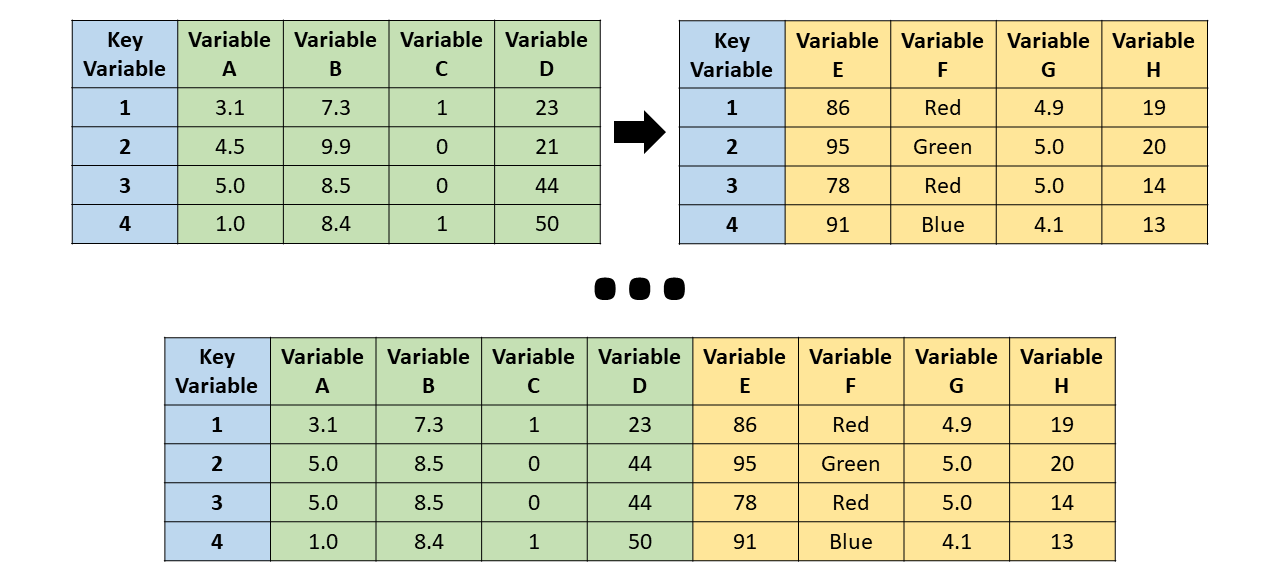

**Vertical Join:**
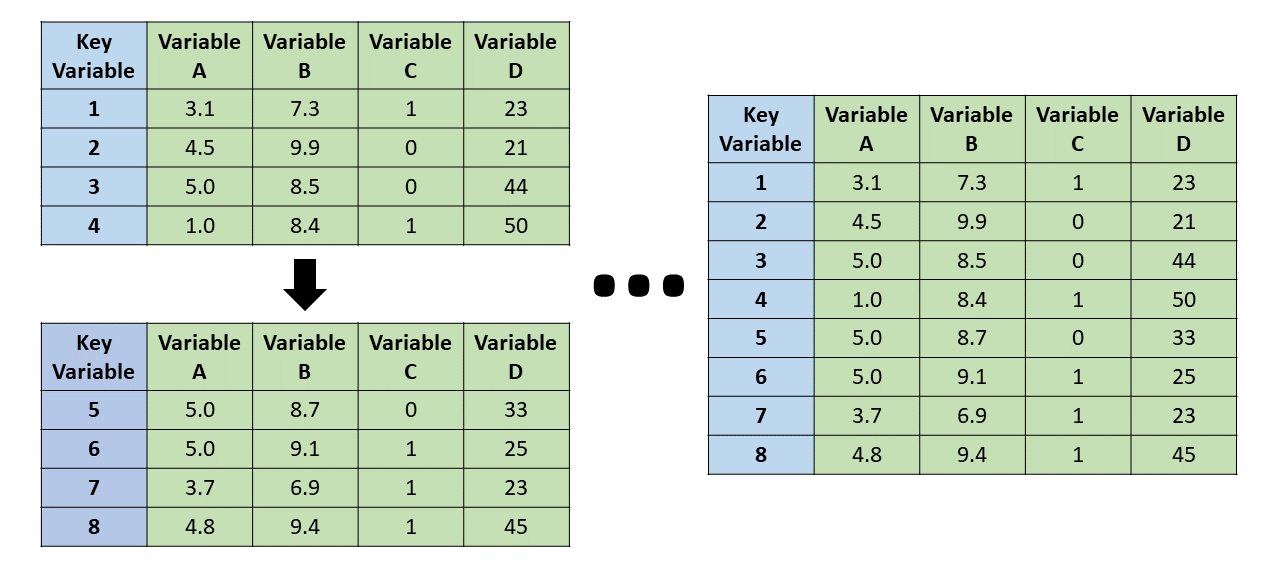

In [ ]:
# Data frames to join horizontally
df1 = df.select(['id', 'age', 'gender'])
df2 = df.select(['id', 'work_type', 'stroke'])

df_hjoin = pl.concat([df1, df2], how = 'align')

print(df1.head())
print(df2.head())

print('-------- Horizontally Joined Data Frame --------')
print(df_hjoin.head())

In [ ]:
# Data frames to join vertically
df3 = df.take_every(3).select(['age', 'gender', 'stroke']).head(2)
df4 = df.take_every(10).select(['age', 'gender', 'stroke']).head(2)

df_vjoin = pl.concat([df3, df4], how='vertical')

print(df3)
print(df4)

print('-------- Vertically Joined Data Frame --------')
print(df_vjoin)

<div style="font-family:monospace; 
            border-radius:10px; 
            border:#A8A8A8 solid; 
            padding: 15px; 
            background-color: #caf0f8; 
            font-size:100%; 
            text-align:left">

<h3 align="left"><font color='#000000'>🖊 Extra Notes:</font></h3>
    
* Unlike Pandas, Polars is **very** strict about data types when joining data frames, which is part of the reason why Polars is fast. For example, if you have two data frames each with a column called ```age``` and you vertically stack them, if the ```dtype``` for ```age``` in one data frame is an integer an the other is a float then Polars will return an error. 
* To change the ```dtype``` of a column it must be "cast" to another type. Casting can be done within the ```.with_columns()``` or ```.select()``` methods mentioned earlier.
* Example: ```df.with_columns(pl.col('age').cast(pl.Float32).alias('age'))``` will cast the column ```age``` to a float32 ```dtype```. 

<a id="section-four"></a>
<p style="font-family: monospace; 
          font-weight: bold; 
          letter-spacing: 1px; 
          color: black; 
          font-size: 200%; 
          text-align: left;
          padding: 8px; 
          border-bottom: 3px solid #4cc9f0" > (4) Converting Polars data frames to Numpy arrays </p>
          
Sometimes Polars data frames need to be converted into different objects. For example, many machine learning libraries require numpy arrays as inputs into machine learning algorithms. The most useful function to know is ```to_numpy()``` which will convert a Polars series or data frame into a numpy array.  

In [ ]:
df.select(['age', 'bmi', 'hypertension']).to_numpy()

<a id="section-five"></a>
<p style="font-family: monospace; 
          font-weight: bold; 
          letter-spacing: 1px; 
          color: black; 
          font-size: 200%; 
          text-align: left;
          padding: 8px; 
          border-bottom: 3px solid #4cc9f0" > (5) Extras </p> 

1. Polars is a new library and has only been in development for a few years. As such, many large language models and code assistants (GPT-4, ChatGPT, Llama, CoPilot, etc) are not very good at returning correct or well-written Polars code. Use such tools cautiously when writing Polars code. 


2. When reading in data as a Polars data frame, for example by using ```pl.read_csv()``` you can specify the ```dtype``` of each column as an argument to the function as well as which encodings should be considered missing.


3. Polars uses the ```null``` type to indicate missingness. Polars has a variety of ways to deal with missing values that can be found in [the documentation](https://pola-rs.github.io/polars-book/user-guide/expressions/null/). To find the number of missing values in each column the ```df.null_count()``` method can be used. 

<a id="section-six"></a>
<p style="font-family: monospace; 
          font-weight: bold; 
          letter-spacing: 1px; 
          color: black; 
          font-size: 200%; 
          text-align: left;
          padding: 8px; 
          border-bottom: 3px solid #4cc9f0" > (6) Useful Links </p>
          
1. [Polars documentation](https://pola-rs.github.io/polars/py-polars/html/reference/)